In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#!pip install -U tensorflow==2.7.0 --target=/kaggle/working/tensorflow
import sys
sys.path.append('/kaggle/working/tensorflow')
import tensorflow as tf
import tensorflow_datasets as tfds
import random
import matplotlib.pyplot as plt
from functools import partial
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
#!pip install scikeras --target=/kaggle/working/scikeras
#sys.path.append('/kaggle/working/scikeras')
from scikeras.wrappers import KerasClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2022-10-15 08:05:54.576433: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-15 08:05:54.576488: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
!ls /kaggle/working/tensorflow/

In [ ]:
!pip install -U tensorflow==2.7.0 --target=/kaggle/working/tensorflow
!pip install scikeras --target=/kaggle/working/scikeras

In [2]:
print(tf.__version__)

2.7.0


In [3]:
train_path = "/kaggle/input/digit-recognizer/train.csv"
test_path = "/kaggle/input/digit-recognizer/test.csv"

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
n_labels = train_df['label'].nunique()
print(n_labels)
n_pixels = test_df.shape[1]
print(n_pixels)

10
784


In [8]:
y = train_df.pop('label').values
X = train_df.values.astype(np.float32)/255

X_test = test_df.values.astype(np.float32)/255

In [43]:
train_size = 40000
X_val, y_val = X[train_size:,:], y[train_size:]
X_val.shape
X_train, y_train = X[:train_size,:], y[:train_size]
X.shape

(42000, 784)

In [44]:
X_val.shape

(2000, 784)

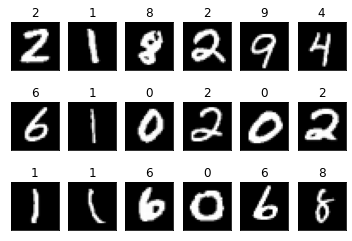

In [10]:
rows = 3
columns = 6
fig, axs = plt.subplots(rows, columns)
plt.subplots_adjust(hspace=0.4)
for i in range(rows):
    for j in range(columns):
        idx = np.random.randint(0, high=train_size-1)
        axs[i, j].imshow(X_train[idx].reshape(28, 28), cmap='gray')
        axs[i, j].set_title(f"{y_train[idx]}")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

In [13]:
regularizedDense = partial(keras.layers.Dense, activation="selu", kernel_initializer="lecun_normal")

In [14]:
def createModel(nodes):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[784]))
    model.add(keras.layers.BatchNormalization())
    for i_nodes in nodes:
        model.add(keras.layers.Dense(i_nodes, activation='elu', kernel_initializer="he_normal"))
        model.add(keras.layers.BatchNormalization())
        #model.add(keras.layers.Dense(i_nodes))
    model.add(keras.layers.Dense(10, activation='softmax'))
    #model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [15]:
seed = 7
tf.random.set_seed(seed)

In [17]:
model = KerasClassifier(model=createModel, loss="sparse_categorical_crossentropy", optimizer="adam", epochs=20,  verbose=0)

In [23]:
# Define grid search parameters
#batch_size = [8, 16, 32, 64]
#epochs = [10, 20, 30]
#param_grid = dict(batch_size=batch_size, epochs=epochs)
nodes = [[100, 100], [300, 100], [100, 100, 100], [300, 100, 100]]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(optimizer__learning_rate=learn_rate, model__nodes=nodes)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [24]:
grid_result = grid.fit(X, y)

2022-10-15 09:12:32.947256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-15 09:12:32.986223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-15 09:12:33.082007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cud

In [25]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972714 using {'model__nodes': [300, 100, 100], 'optimizer__learning_rate': 0.001}
0.967286 (0.000881) with: {'model__nodes': [100, 100], 'optimizer__learning_rate': 0.001}
0.964286 (0.003971) with: {'model__nodes': [100, 100], 'optimizer__learning_rate': 0.01}
0.931643 (0.009833) with: {'model__nodes': [100, 100], 'optimizer__learning_rate': 0.1}
0.921405 (0.018785) with: {'model__nodes': [100, 100], 'optimizer__learning_rate': 0.2}
0.907286 (0.046625) with: {'model__nodes': [100, 100], 'optimizer__learning_rate': 0.3}
0.972452 (0.001201) with: {'model__nodes': [300, 100], 'optimizer__learning_rate': 0.001}
0.969810 (0.002669) with: {'model__nodes': [300, 100], 'optimizer__learning_rate': 0.01}
0.943667 (0.005944) with: {'model__nodes': [300, 100], 'optimizer__learning_rate': 0.1}
0.951429 (0.012802) with: {'model__nodes': [300, 100], 'optimizer__learning_rate': 0.2}
0.906571 (0.014816) with: {'model__nodes': [300, 100], 'optimizer__learning_rate': 0.3}
0.967095 (0.002556) with

In [45]:
new_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
history = new_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2637 - accuracy: 0.9186 - val_loss: 0.1626 - val_accuracy: 0.9535
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1241 - accuracy: 0.9620 - val_loss: 0.1309 - val_accuracy: 0.9625
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0870 - accuracy: 0.9727 - val_loss: 0.1101 - val_accuracy: 0.9670
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0681 - accuracy: 0.9775 - val_loss: 0.1193 - val_accuracy: 0.9680
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0573 - accuracy: 0.9815 - val_loss: 0.1094 - val_accuracy: 0.9690
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0445 - accuracy: 0.9849 - val_loss: 0.1069 - val_accuracy: 0.9715
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0393 - accuracy: 0.9870 - val_loss: 0.1047 - val_accuracy:

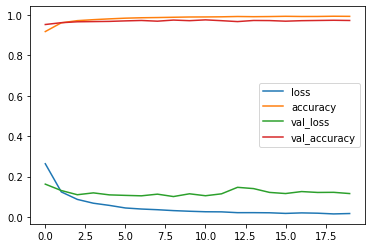

In [47]:
pd.DataFrame(history.history).plot()
plt.show()

In [48]:
y_pred = np.argmax(new_model.predict(X_test), axis=1)
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [49]:
submission = pd.DataFrame({'ImageId': test_df.index, 'Label':y_pred})
submission.ImageId=submission.ImageId.apply(lambda i:i+1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [50]:
submission.shape

(28000, 2)

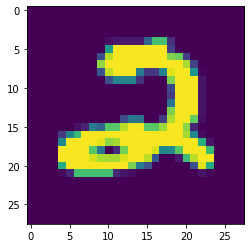

In [51]:
a=test_df.iloc[0,0:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [52]:
submission.to_csv("submission.csv", index=False)